# Simple example of integrating the Rubidium wavefunction

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from numerov.rydberg import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("numerov").setLevel(logging.WARNING)

In [2]:
qn_list = np.array([(n, n - 1, n - 0.5, n - 0.5) for n in range(20, 150)])

In [3]:
def get_zmin(state: RydbergState) -> dict[str, float]:
    zmin = {
        r"z(V_{hydrogen}=E_{hydrogen})": state.calc_hydrogen_z_turning_point(),
        "z(V=E)": state.calc_z_turning_point(),
        "z_cutoff": state.z_cutoff,
        "used zmin": state.zmin,
        "z(V=0)": state.calc_z_V_eq_0(),
    }
    return zmin

In [4]:
zmin_list = []
for qn in qn_list:
    print(f"n={qn[0]}", end="\r")
    state = RydbergState("Rb", qn[0], qn[1], qn[2], dz=0.001)
    state.integrate()
    zmin = get_zmin(state)
    zmin_list.append(zmin)

zmin_dict = {key: [zmin[key] for zmin in zmin_list] for key in zmin_list[0].keys()}

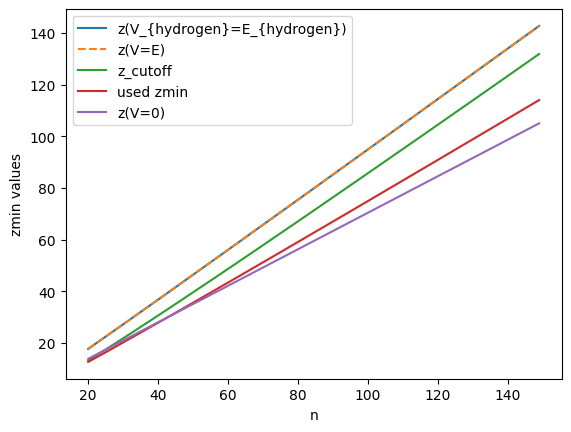

In [5]:
n_list = qn_list[:, 0]
fig, ax = plt.subplots()

ls_dict = {"z(V=E)": "--"}

for key, values in zmin_dict.items():
    ax.plot(n_list, values, ls=ls_dict.get(key, "-"), label=key)

ax.set_xlabel("n")
ax.set_ylabel("zmin values")

ax.legend()
plt.show()